# Вероятность

## Условная вероятность

Пусть есть два события $A$ и $B$. Тогда условная вероятность вводится следующим образом(аксиоматически):

$$p(A|B) = \frac{p(A, B)}{p(B)}$$

Которое показывает какая вероятность наступить событию $A$, если событие $B$ уже наступило.

Если $p(A|B)=p(A)$, то говорят что событие $A$ не зависит от $B$.

## Формула Байеса

Формула Байеса выводится из формулы условной вероятности в два щелчка:

$$p(A|B) = \frac{p(A, B)}{p(B)} = \frac{p(A) p(B|A)}{p(B)}$$

Мы к ней ещё вернёмся.

# Задача 0.

В семье два ребёнка. Каждый ребёнок может быть или мальчиком, или девочкой с равной вероятностью 50%.

Тогда полное пространство событий описывается четырьмя событиями.

![](full_space_boy_girl.png)

#### Если известно что в семье два ребёнка, то какая вероятность, что оба мальчики?

$$p(bb) = \frac{1}{2} \frac{1}{2} = \frac{1}{4}$$

![](two_boys.png)

#### Если известно что в семье два ребёнка и один из них мальчик, то какая вероятность, что другой тоже мальчик?

$$p(bb | b) = \frac{p(bb) p(b | bb)}{p(b)} = \frac{\frac{1}{4} \cdot 1}{\frac{3}{4}}$$

$p(b)$ - вероятность что хотя бы один мальчик.

![](one_is_a_boy.png)

#### Если известно что в семье два ребёнка и старший из них мальчик, то какая вероятность, что младший тоже мальчик?

$$p(bb | b_{old} ) = \frac{p(bb_{old}) p(b_{old} | bb)}{p(b_{old})} = \frac{\frac{1}{4} \cdot 1}{\frac{1}{2}}$$

Разница между предыдущим в том что мы определили порядок на парах (мальчик/девочка, мальчик/девочка), что сильно влияет на вероятности(см. картинку).

![](old_is_boy.png)

#### Если известно что в семье два ребёнка и один из них мальчик родившийся во вторник, то какая вероятность, что второй тоже мальчик?

$$p(bb | b_{tuesday} ) = \frac{p(bb) p(b_{tuesday} | bb)}{p(b_{tuesday})}$$

Вероятность что хотя бы один мальчик родился во вторник это (1 - вороятность что ни один не родился во вторник).

$$p(b_{tuesday} | bb) = \left(1 - \left(1 - \frac{1}{7}\right)^2\right) = \frac{13}{49}$$

Это равно синей площади на графике ниже.

$p(b_{tuesday})$ посчитаем по картинке:

$$b_{tuesday} = \frac{1}{4} \frac{1}{7} + \frac{1}{4} \frac{1}{7} + \frac{1}{4} p(b_{tuesday} | bb) = \frac{27}{196}$$

Тогда,

$$p(bb | b_{tuesday} ) = \frac{\frac{1}{4} \frac{13}{49}}{\frac{27}{196}} = \frac{13}{27} \approx 0.481$$

![](tuesday_boy.png)

#### Мы проходили мимо дома семьи и увидели в окне мальчика, какая вероятность что второй ребёнок тоже мальчик?

$$p(b) = \frac{1}{2}$$

![](one_is_a_boy_obs.png)

Важный момент! 

Априорное знание что один ребёнок мальчик не тоже самое что пронаблюдать что один из детей мальчик.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2)

# 2. Жизненная задачка

По Дарвину приспособленность является центральной концепцией теории эволюции. 

Давайте определим "относительную приспособленность" как среднее количество выживших представителей одного генотипа к среднему количеству выживших представителей другого генотипа. 

Eyre-Walker (2006) ( https://www.ncbi.nlm.nih.gov/pubmed/16547091 ) предположили, что функция преспособленности принадлежит семейству гамма-распределений случайных величин. 

Они проверили своё предположение для популяций(кого?) с мутацией `deleterious amino acid`(что это значит?). 

Они получили следующие оценки на параметры гамма-распределения:
 
$$\hat{\alpha} = 0.23,~~~ \hat{\beta} = 5.35$$


$$\Gamma(x|\alpha, \beta) =  \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x),$$

где $\Gamma(\alpha)$ -- гамма-функция Эйлера(для целых $\alpha$: $\Gamma(k) = (\alpha-1)!$)

#### Зададимся следующим вопросом

Если мы оцениваем параметры $\alpha$ и $\beta$ по случайной выборке, как сильно мы в среднем ошибаемся при размере выборки $N=100$? 

Т.е. нас интересуют две вещи: __дисперсии__ наших оценок и __корреляция__ оценок.

Оценивать мы будем их по следующему алгоритму:

  1. Сэмплируем выборку $X \sim \Gamma(x|\hat{\alpha}, \hat{\beta})$
  2. Оцениваем $\alpha_{fit}, \beta_{fit}$ по выборке $X$
  3. Сохраняем $\alpha_{fit}, \beta_{fit}$
  4. Повторяем шаги 1-3 несколько тысяч раз
  5. Считаем дисперсии и корреляции $\{\alpha_{fit}, \beta_{fit}\}_{i=1}^{B}$

## 2.1 Метод оценки параметров максимума правдоподобия

MLE(Метод оценки параметров максимума правдоподобия) основывается на максимизации вероятности пронаблюдать выборку.

$$\mathcal{L} = \prod p(x_i|\theta)$$

Будем рассматривать MLE на примере задачи выше.

In [2]:
from scipy.stats import gamma

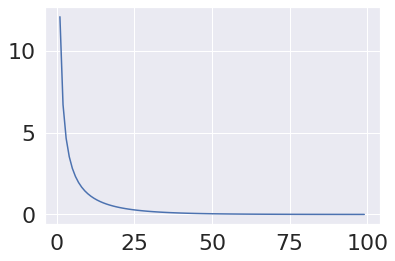

In [3]:
# scale == \theta
# в scipy все распределения определены с точность до смещения и масштаба
x = np.linspace(0, 1, 100)
alpha = 0.23
beta = 5.35
plt.plot(gamma.pdf(x, scale=1 / beta, a=alpha))

In [4]:
np.random.seed(1337)
X = gamma.rvs(scale=1 / beta, a=alpha, size=100)

In [5]:
gamma.pdf(X[0], scale=1 / beta, a=alpha)

119.31210382989336

In [6]:
np.prod(gamma.pdf(X, scale=1 / beta, a=2.5))

1.653645679480908e-267

Уравнение правдоподобия чаще всего записывается с использованием логарифма вероятности, так как в этом случае произведение переходит в сумму, что сильно упрощает жизнь.

$$\mathcal{\log L} = \sum\limits_i \log p(x_i|\theta)$$

  * более хорошая численная стабильность(предотвращает overflow или underflow ошибки);
  * более (относительно)точные градиенты;
  * более гладкая задача(методы оптимизации лучше работают).

Посмотрим на зависимость log-likelihood для нашей задачи с гамма-распределением.

$$\mathcal{L} = \prod\limits_i \frac{\beta^\alpha}{\Gamma(\alpha)} {x_i}^{\alpha-1} \exp(-\beta x_i)$$

$$\mathcal{\log L} = \sum\limits_i \left(  \alpha \log \beta - \log \Gamma(\alpha) - \beta x_i + (\alpha - 1) \log x_i \right)$$

(Обратим внимание насколько простой стала зависимость от $x_i$:)

Text(0.5, 1.0, 'Likelihood')

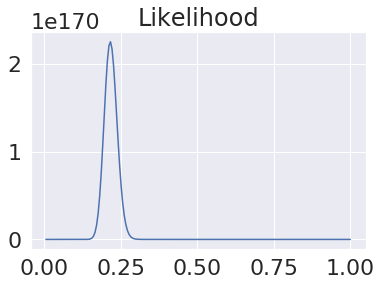

In [7]:
a = np.linspace(0, 1, 200)
plt.plot(
    a, 
    np.prod(gamma.pdf(X[:, np.newaxis], 
                      scale=1 / beta, 
                      a=a), 
            axis=0)
)
plt.title('Likelihood')

Text(0.5, 1.0, 'Log-Likelihood')

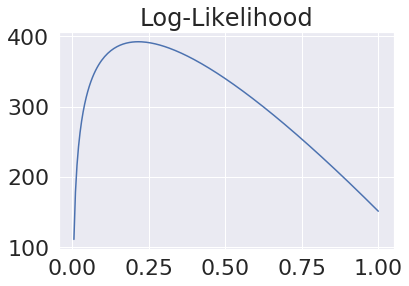

In [8]:
plt.plot(
    a, 
    np.sum(gamma.logpdf(X[:, np.newaxis], 
                        scale=1 / beta, 
                        a=a), 
            axis=0)
)
plt.title('Log-Likelihood')

### MLE? MLE!

В большинстве задач, если это не игровые примеры, найти явную форму для оценки параметров с помощью MLE очень сложно.

$$\theta^* = \arg \max \log \mathcal{L}(X, \theta)$$

Берём первую производную по каждому параметра распределения и приравниваем к нулю:

$$ \mathcal{\log L}'(X, \theta) = 0$$

Для параметра $\beta$ гамма-распределения:

$$\mathcal{\log L}'_\beta = \sum\limits_{i} \frac{\alpha}{\beta} - x_i = 0$$

$$\beta = \frac{\alpha N}{\sum\limits_i x_i}$$

Для параметра $\alpha$:

$$\mathcal{\log L}'_\alpha = \sum \log \beta + \log x_i - \psi(\alpha) = 0$$

$$\alpha = \log \beta + \frac{1}{N} \sum \log x_i$$


Итого:

$$\alpha = \log \beta + \frac{1}{N} \sum \log x_i$$

$$\beta = \frac{\alpha N}{\sum\limits_i x_i}$$

Увы, точного решения нет. 

Но есть кое-что лучше(и более применимое на практике)

In [9]:
gamma.fit?

In [10]:
alpha, _, beta = gamma.fit(X, floc=0.)
beta = 1 / beta
print(alpha, beta)

0.2313491743258105 7.52708487472913


## Пришло время эксперимента :)

In [11]:
%%time
boot = 100000
alphas = []
betas = []
fitted_alphas = []
fitted_betas = []
for i in range(boot):
    X = gamma.rvs(scale=1 / beta, a=alpha, size=100)
    fit_alpha, _, fit_beta = gamma.fit(X, floc=0)
    fitted_betas.append(1 / fit_beta)
    fitted_alphas.append(fit_alpha)

CPU times: user 14.6 s, sys: 0 ns, total: 14.6 s
Wall time: 14.6 s


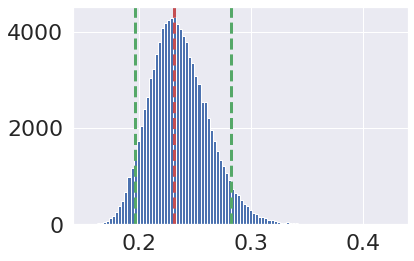

In [12]:
plt.hist(fitted_alphas, bins=100);
alpha_q5, alhpa_q95 = np.percentile(fitted_alphas, [5, 95])
plt.axvline(x=alpha, linewidth=3, color='r',linestyle='--')
plt.axvline(x=alpha_q5, linewidth=3, color='g',linestyle='--')
plt.axvline(x=alhpa_q95, linewidth=3, color='g',linestyle='--')

In [13]:
np.mean(np.array(fitted_alphas) - alpha)

0.004552763960686468

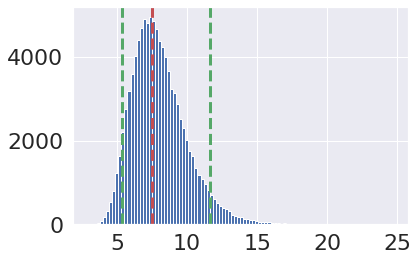

In [14]:
plt.hist(fitted_betas, bins=100);
beta_q5, beta_q95 = np.percentile(fitted_betas, [5, 95])
plt.axvline(x=beta, linewidth=3, color='r',linestyle='--')
plt.axvline(x=beta_q5, linewidth=3, color='g',linestyle='--')
plt.axvline(x=beta_q95, linewidth=3, color='g',linestyle='--')

In [15]:
np.mean(np.array(fitted_betas) - beta)

0.4963190809415543

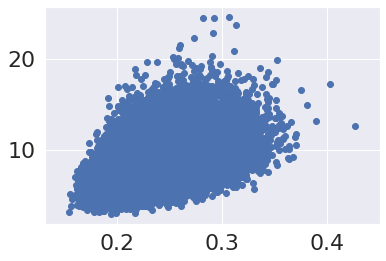

In [16]:
plt.scatter(fitted_alphas, fitted_betas)

In [17]:
np.corrcoef(fitted_alphas, fitted_betas)

array([[1.        , 0.45634178],
       [0.45634178, 1.        ]])

In [18]:
from scipy.stats.stats import pearsonr
pearsonr(fitted_alphas, fitted_betas)

(0.4563417810330898, 0.0)

## 2.2 Метод моментов

Идея простая. Если мы хотим определить параметры некоторого распределения $p(x | \theta)$, то давайте приравняем моменты данного распределения к моментам подсчитанным по данным($X = \{ x_1, \dots, x_n \}$) и решим уравнения относительно данных моментов.

Моменты по данным считаются следующим образом:

$$\hat{\mu}_k = \frac{1}{n} \sum\limits_{i=1}^{n} x_i^k$$

Моменты распределений:

$$\mu_k = \sum\limits_{i=1}^{n} x^k p(x | \theta) dx$$

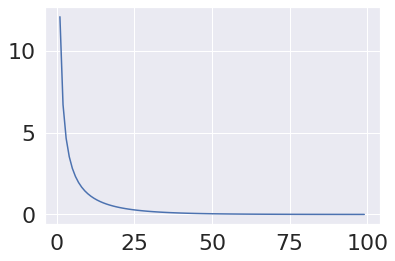

In [19]:
from scipy.stats import gamma
# scale == \theta
# в scipy все распределения определены с точность до смещения и масштаба
x = np.linspace(0, 1, 100)
alpha = 0.23
beta = 5.35
plt.plot(gamma.pdf(x, scale=1 / beta, a=alpha))

Среднее и дисперсия гамма-распределения:

$$\mu(\Gamma) = \frac{\alpha}{\beta}$$

$$Var(\Gamma) = \frac{\alpha}{\beta^2}$$

Применяем метод моментов:

$$\hat{\mu}_1 = \frac{\alpha}{\beta}$$

$$\hat{\mu}_2 = \frac{\alpha^2}{\beta^2} + \frac{\alpha}{\beta^2}$$

Решая систему уравнений получаем:

$$\beta = \frac{\hat{\mu}_1}{\hat{\mu}_2 - \hat{\mu}_1^2}$$

$$\alpha = \hat{\mu}_1 \beta$$

In [20]:
%%time
boot = 100000
fitted_alphas = []
fitted_betas = []
for i in range(boot):
    X = gamma.rvs(scale=1 / beta, a=alpha, size=100)
    mu_1 = X.mean()
    mu_2 = np.square(X).mean()
    fitted_betas.append(
        mu_1 / (mu_2 - mu_1**2)
    )
    
    fitted_alphas.append(
        mu_1**2 / (mu_2 - mu_1**2)
    )

CPU times: user 9.82 s, sys: 12 ms, total: 9.83 s
Wall time: 9.83 s


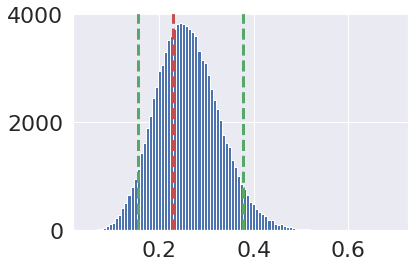

In [21]:
plt.hist(fitted_alphas, bins=100);
alpha_q5, alhpa_q95 = np.percentile(fitted_alphas, [5, 95])
plt.axvline(x=alpha, linewidth=3, color='r',linestyle='--')
plt.axvline(x=alpha_q5, linewidth=3, color='g',linestyle='--')
plt.axvline(x=alhpa_q95, linewidth=3, color='g',linestyle='--')

In [22]:
np.mean(np.array(fitted_alphas) - alpha)

0.030714945466234912

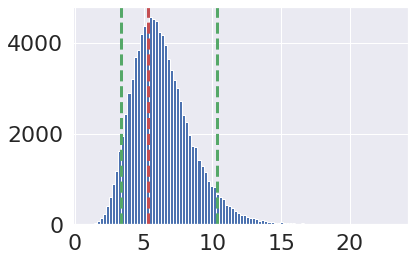

In [23]:
plt.hist(fitted_betas, bins=100);
beta_q5, beta_q95 = np.percentile(fitted_betas, [5, 95])
plt.axvline(x=beta, linewidth=3, color='r',linestyle='--')
plt.axvline(x=beta_q5, linewidth=3, color='g',linestyle='--')
plt.axvline(x=beta_q95, linewidth=3, color='g',linestyle='--')

In [24]:
np.mean(np.array(fitted_betas) - beta)

0.9890596521196864

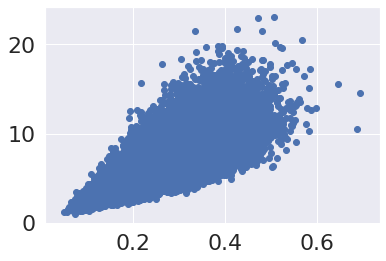

In [25]:
plt.scatter(fitted_alphas, fitted_betas)

In [26]:
from scipy.stats.stats import pearsonr
np.corrcoef(fitted_alphas, fitted_betas)

array([[1.        , 0.75226067],
       [0.75226067, 1.        ]])

In [27]:
pearsonr(fitted_alphas, fitted_betas)

(0.7522606743143687, 0.0)

## Выводы

Что мы можем сказать, сравнив метод моментов и MLE оценки? Как они соотносятся?

# 3. MAP

Предположим, что вы подбросили моменту один раз и у вас выпал орёл. 

Распределение описывается распредлением Бернулли: $p(x=1, q) = q$.

Для выборки $x_1, x_2, \dots, x_N$ правдоподобие записывается следующим образом:

$$p(X, q) = \prod q^{x_i} (1 - q)^{1-x_i}$$

$$\log p(X, q) = \sum\left[ x_i \log q + (1 - x_i) \log( - q) \right]$$

Тогда оценка на параметры высчитывается следующим образом:


$$\frac{\partial }{\partial q} \log p(X, q) = \frac{1}{q} \sum x_i - \frac{1}{1-q} \sum (1 - x_i) = 0$$

Получаем:

$$q = \frac{\sum x_i}{n}$$

В согласии с методом максимума правдоподобия следует, что $p=1$, т.е. следует что монетка всегда будет выпадать орлом.

Такая оценка не очень хорошо согласуется с реальностью. 

Однако у вас есть некоторое априорное знание. Вы точно знаете, что честная монетка выпадает орлом в 50% случаев.

Можем ли мы как-то это использовать? Да, это обеспечивается введением априорного распределения.

В MLE оценка параметров выглядела так:

$$\theta = \mathrm{argmax} \log P(X | \theta) = \mathrm{argmax} \sum \log p(x_i, \theta) $$


В MAP мы говорим, что есть ещё распределение $P(\theta)$, которое появляется из некоторых наших знаний о мире. Тогда MAP записывается следующим образом:

$$
\theta = \mathrm{argmax}  P(X | \theta) P(\theta) = \mathrm{argmax} \left( \sum  \log p(x_i, \theta) \right) P(\theta)
$$

Вернёмся к монете.

Априорное распределени моделируется бета-распределением у которого плотность вероятности выглядит так:

![betapdf](https://wikimedia.org/api/rest_v1/media/math/render/svg/125fdaa41844a8703d1a8610ac00fbf3edacc8e7)

![beta](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Beta_distribution_pdf.svg/531px-Beta_distribution_pdf.svg.png)

В таком случае:

$$p(X, q) p(q) = \prod q^{x_i} (1 - q)^{1-x_i} \frac{1}{B(\alpha, \beta)} q^{\alpha - 1} (1 - q)^{\beta - 1}$$

Лог-вероятность:

$$\log p(X, q) p(q) = (\alpha - 1) \log q + (\beta - 1) \log (1 - q) +  \sum\left[ x_i \log q + (1 - x_i) \log( - q) \right] $$

Производная:


$$\frac{\partial }{\partial q} \log p(X, q) p(q) = $$

$$ = \frac{1}{q} \sum x_i - \frac{1}{1-q} \sum (1 - x_i) + \frac{\alpha - 1}{q} - \frac{\beta - 1}{1 - q} = 0$$

Решая уравнение выше получаем:

$$\mu = \frac{\sum x_i + \alpha - 1}{n + \beta + \alpha - 2}$$


Пусть наш приор $\alpha=\beta=2$(см. картинку выше).

Тогда при одном броске монеты получаем следующую оценку:

$$q = \frac{1 + 2 - 1}{1 + 2 + 2 - 2} = \frac{2}{3} \approx 0.66$$

# Бонусная задача

